In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs
import os
import datetime
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
from tqdm import tqdm
import pickle
import time
import math
from google.colab import output
import cv2

In [ ]:
def get_dataframe(stock, anaysis_period = 3650*2):
    # A huge epoch that allows most up to date info
    current_epoch = 3000000000
    past_epoch = int((dt.now() - datetime.timedelta(anaysis_period)).timestamp())
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={past_epoch}&period2={current_epoch}&interval=1d&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    return df

def update_stock_df():
    REPORT_PERIOD = 1

    labels = [i/10000 for i in range(2000, -1, -100)]
    brightnesses = [i for i in range(255, 34, -11)]

    stock_df = {}
    color_list = []
    # load valid symbols in drive
    with open("/content/drive/MyDrive/Code/stock_trend/valid_symbols.txt", "rb") as f:
        symbols = pickle.loads(f.read())

    initialized = False
    i = 1
    total_stock = 0
    total_change = 0
    change_list = []

    for symbol in tqdm(symbols):
        start = time.time()

        try:
            df = get_dataframe(symbol)
            stock_df[symbol] = df

            change = ((df.Close - df.shift(REPORT_PERIOD).Close) / df.shift(REPORT_PERIOD).Close).to_list()[-1]
            idx = 0
            while abs(change) < labels[idx]:
                idx += 1
            brightness = brightnesses[idx]
            if change > 0:
                color = (0, brightness, 0)
            else:
                color = (brightness, 0, 0)

            color_list.append(color)
            color_matrix = []

            color_list = sorted(color_list)

            DIMENSION = int(len(color_list)**(1/2))

            for i in range(DIMENSION):
                color_matrix.append(color_list[i*DIMENSION:(i+1)*DIMENSION])


            if len(color_list) > DIMENSION * DIMENSION:
                a = color_list[DIMENSION * DIMENSION:]
                while len(a) > DIMENSION:
                    color_matrix.append(a[:DIMENSION])
                    a = a[DIMENSION:]
                while len(a) < DIMENSION:
                    a.append((255,255,255))

                color_matrix.append(a)

            plt.clf()
            plt.imshow(color_matrix)
            plt.savefig(f"{i}.png")
            plt.show()

            if not math.isnan(change):
                total_change += change
                total_stock += 1
                print("ave. change", total_change / total_stock)
                change_list.append(change)
                print("med. change", sorted(change_list)[len(change_list)//2])

            img = cv2.imread(f"{i}.png")
            height, width, layers = img.shape
            size = (width,height)

            if not initialized:
                out = cv2.VideoWriter(f"output.mp4",cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
                initialized = True

            i += 1
            out.write(img)

        except Exception as e:
            print(e)

        while time.time() - start < 1:
            pass

    with open("/content/drive/MyDrive/Investment_Analysis/stock_df.txt", "wb") as f:
        f.write(pickle.dumps(stock_df))
    out.release()

  0%|          | 0/7078 [00:00<?, ?it/s]

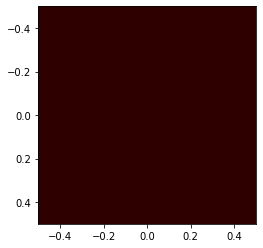

  0%|          | 1/7078 [00:01<2:38:31,  1.34s/it]

ave. change -0.013210678839666748
med. change -0.013210678839666748


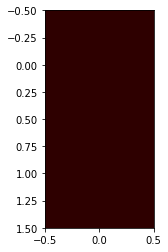

  0%|          | 2/7078 [00:03<3:00:13,  1.53s/it]

ave. change -0.01263063586442632
med. change -0.01205059288918589


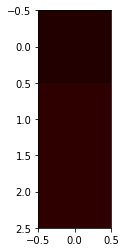

ave. change -0.009074018680859363
med. change -0.01205059288918589


  0%|          | 3/7078 [00:04<2:33:21,  1.30s/it]

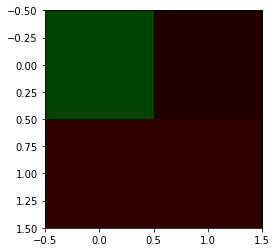

  0%|          | 4/7078 [00:05<2:27:36,  1.25s/it]

ave. change 0.0015278193226888354
med. change -0.0019607843137254485


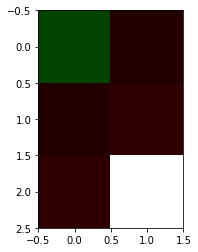

  0%|          | 5/7078 [00:06<2:17:04,  1.16s/it]

ave. change 0.0012222554581510683
med. change -0.0019607843137254485


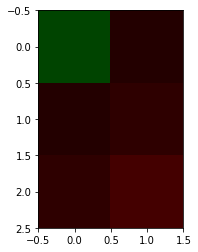

  0%|          | 6/7078 [00:07<2:11:35,  1.12s/it]

ave. change -0.0049387826848463975
med. change -0.0019607843137254485


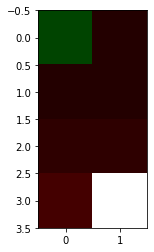

  0%|          | 7/7078 [00:08<2:14:46,  1.14s/it]

ave. change -0.005179316095052826
med. change -0.006622516556291397


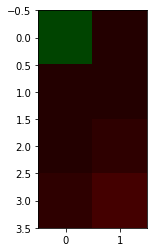

  0%|          | 8/7078 [00:09<2:09:33,  1.10s/it]

ave. change -0.0057146919057518755
med. change -0.006622516556291397


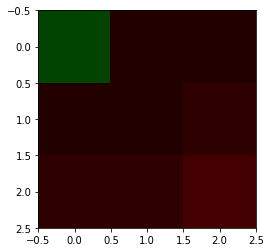

  0%|          | 9/7078 [00:10<2:05:59,  1.07s/it]

ave. change -0.00710944537021115
med. change -0.009462322580645222


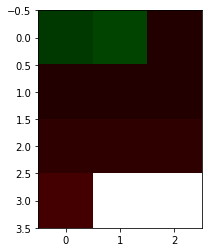

ave. change -0.003919624776852007
med. change -0.006622516556291397


  0%|          | 10/7078 [00:11<2:03:40,  1.05s/it]

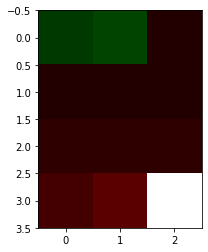

ave. change -0.00819787635685298
med. change -0.009462322580645222


  0%|          | 11/7078 [00:12<2:01:58,  1.04s/it]

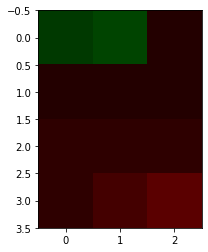

ave. change -0.008456026749042141
med. change -0.009462322580645222


  0%|          | 12/7078 [00:13<2:00:59,  1.03s/it]

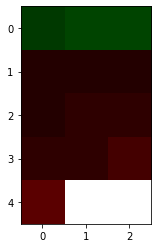

  0%|          | 13/7078 [00:14<2:02:48,  1.04s/it]

ave. change -0.005392290151453679
med. change -0.009462322580645222


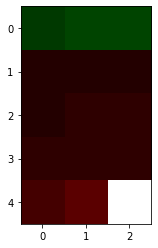

  0%|          | 14/7078 [00:15<2:05:06,  1.06s/it]

ave. change -0.00597112588976608
med. change -0.009462322580645222


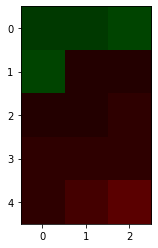

  0%|          | 15/7078 [00:16<2:03:43,  1.05s/it]

ave. change -0.004188829688730489
med. change -0.009462322580645222


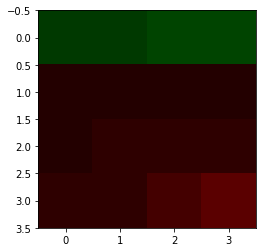

  0%|          | 16/7078 [00:17<2:06:16,  1.07s/it]

ave. change -0.004358999847165509
med. change -0.006911552223690813


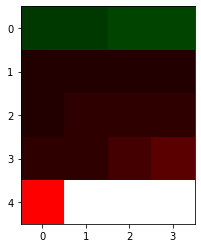

  0%|          | 17/7078 [00:18<2:03:51,  1.05s/it]

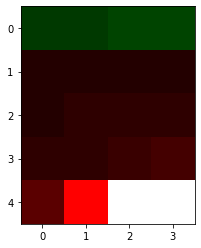

ave. change -0.005428613095889754
med. change -0.009462322580645222


  0%|          | 18/7078 [00:19<2:02:03,  1.04s/it]

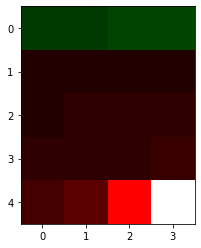

ave. change -0.005951478071029307
med. change -0.009462322580645222


  0%|          | 19/7078 [00:20<2:01:06,  1.03s/it]

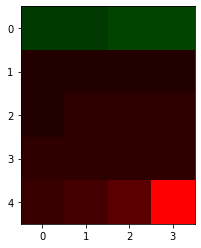

ave. change -0.006427716067290922
med. change -0.011295681063122918


  0%|          | 20/7078 [00:21<2:00:23,  1.02s/it]

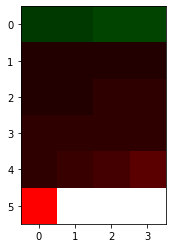

  0%|          | 21/7078 [00:22<1:59:55,  1.02s/it]

ave. change -0.006125901650176083
med. change -0.009462322580645222


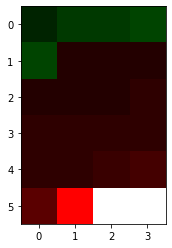

ave. change -0.005546972246247253
med. change -0.009462322580645222


  0%|          | 22/7078 [00:23<1:59:24,  1.02s/it]

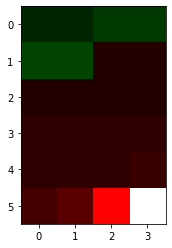

ave. change -0.005240550928977204
med. change -0.006911552223690813


  0%|          | 23/7078 [00:24<1:58:57,  1.01s/it]

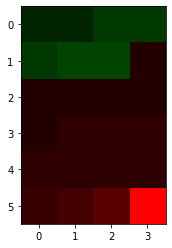

ave. change -0.0037830078396014506
med. change -0.006911552223690813


  0%|          | 24/7078 [00:25<1:58:43,  1.01s/it]

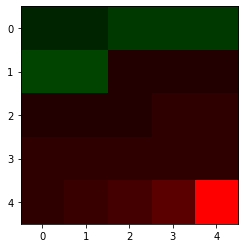

ave. change -0.004372400222915876
med. change -0.006911552223690813


  0%|          | 25/7078 [00:26<1:58:26,  1.01s/it]

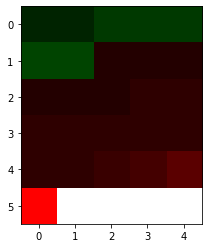

ave. change -0.004855904552515812
med. change -0.009462322580645222


  0%|          | 26/7078 [00:27<1:58:13,  1.01s/it]

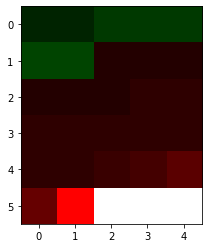

ave. change -0.007031459973166875
med. change -0.009462322580645222


  0%|          | 27/7078 [00:28<1:58:10,  1.01s/it]

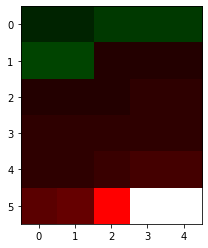

ave. change -0.008092912595149167
med. change -0.011295681063122918


  0%|          | 28/7078 [00:29<1:58:17,  1.01s/it]

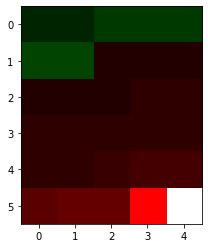

ave. change -0.010069338424640112
med. change -0.011295681063122918


  0%|          | 29/7078 [00:30<1:58:12,  1.01s/it]

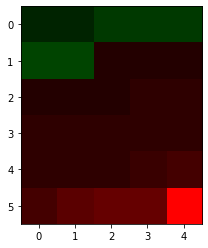

ave. change -0.010411775030687001
med. change -0.01205059288918589


  0%|          | 30/7078 [00:31<1:58:28,  1.01s/it]

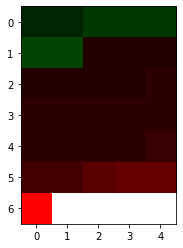

  0%|          | 31/7078 [00:32<1:58:32,  1.01s/it]

ave. change -0.010189545117730256
med. change -0.011295681063122918


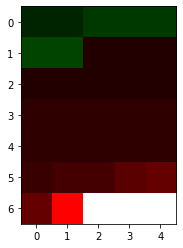

ave. change -0.00992428780226314
med. change -0.011295681063122918


  0%|          | 32/7078 [00:33<1:58:38,  1.01s/it]

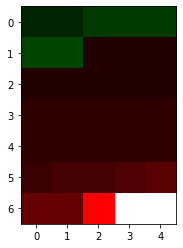

  0%|          | 33/7078 [00:34<1:59:36,  1.02s/it]

ave. change -0.011054245974341036
med. change -0.011295681063122918


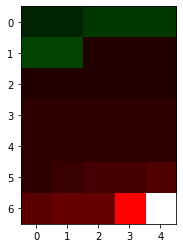

ave. change -0.011195469779863848
med. change -0.01205059288918589


  0%|          | 34/7078 [00:35<1:59:15,  1.02s/it]

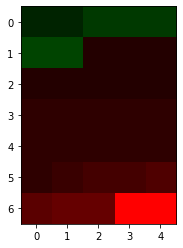

  0%|          | 35/7078 [00:36<1:58:45,  1.01s/it]

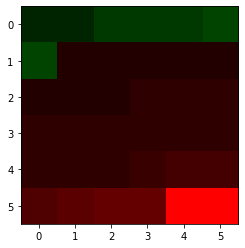

ave. change -0.011225117658711325
med. change -0.01205059288918589


  1%|          | 36/7078 [00:37<1:58:23,  1.01s/it]

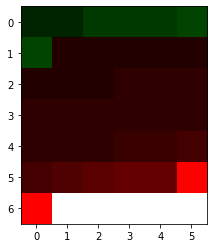

ave. change -0.011528649711199523
med. change -0.012203497660678003


  1%|          | 37/7078 [00:38<1:58:37,  1.01s/it]

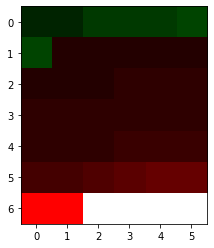

ave. change -0.012011667305898886
med. change -0.012203497660678003


  1%|          | 38/7078 [00:39<1:58:20,  1.01s/it]

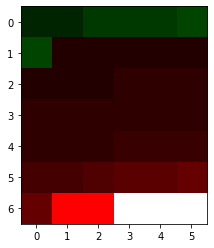

ave. change -0.013060532301175874
med. change -0.013210678839666748


  1%|          | 39/7078 [00:40<1:58:07,  1.01s/it]

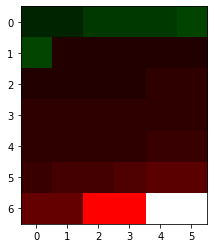

ave. change -0.012919609857777951
med. change -0.012203497660678003


  1%|          | 40/7078 [00:41<1:57:59,  1.01s/it]

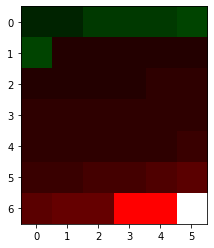

ave. change -0.013083939526831484
med. change -0.013210678839666748


  1%|          | 41/7078 [00:42<1:57:50,  1.00s/it]

HTTP Error 404: Not Found


  1%|          | 42/7078 [00:43<1:57:50,  1.00s/it]

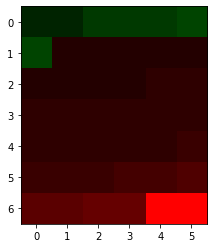

ave. change -0.013286876374349743
med. change -0.013210678839666748


  1%|          | 43/7078 [00:45<1:57:56,  1.01s/it]

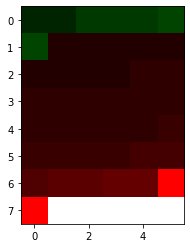

ave. change -0.0136820057185651
med. change -0.013495990487827285


  1%|          | 44/7078 [00:46<1:57:49,  1.01s/it]

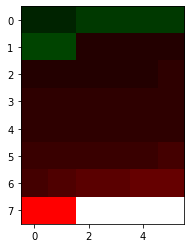

ave. change -0.012744393504817172
med. change -0.013210678839666748


  1%|          | 45/7078 [00:47<1:57:42,  1.00s/it]

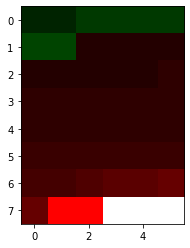

ave. change -0.012956314530935908
med. change -0.013495990487827285


  1%|          | 46/7078 [00:48<1:57:37,  1.00s/it]

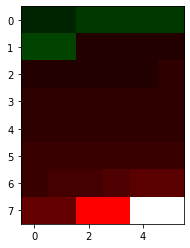

ave. change -0.013341827055563431
med. change -0.013495990487827285


  1%|          | 47/7078 [00:49<1:57:33,  1.00s/it]

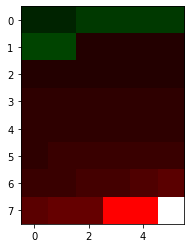

ave. change -0.013067322447294947
med. change -0.013495990487827285


  1%|          | 48/7078 [00:50<1:57:29,  1.00s/it]

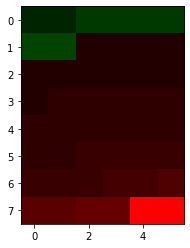

ave. change -0.01278325022017984
med. change -0.013210678839666748


  1%|          | 49/7078 [00:51<1:57:26,  1.00s/it]

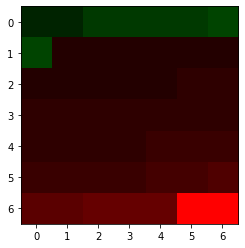

ave. change -0.013834275694272789
med. change -0.013495990487827285


  1%|          | 50/7078 [00:52<1:57:25,  1.00s/it]

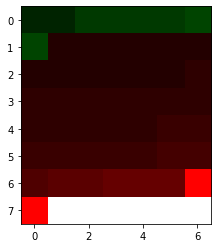

ave. change -0.013546061617308772
med. change -0.013210678839666748


  1%|          | 51/7078 [00:53<1:57:22,  1.00s/it]

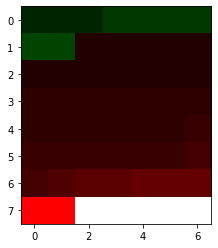

ave. change -0.013250714932752962
med. change -0.013210678839666748


  1%|          | 52/7078 [00:54<1:57:21,  1.00s/it]

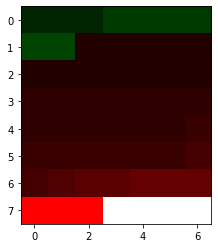

  1%|          | 53/7078 [00:55<1:57:19,  1.00s/it]

HTTP Error 404: Not Found


  1%|          | 54/7078 [00:56<1:57:18,  1.00s/it]

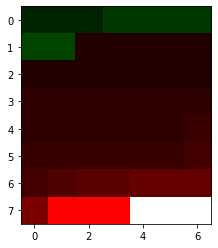

ave. change -0.014591424004527155
med. change -0.013210678839666748


  1%|          | 55/7078 [00:57<1:57:19,  1.00s/it]

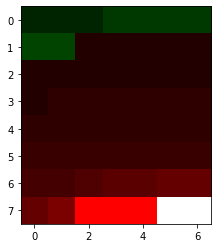

ave. change -0.014367367788007514
med. change -0.013210678839666748


  1%|          | 56/7078 [00:58<1:57:23,  1.00s/it]

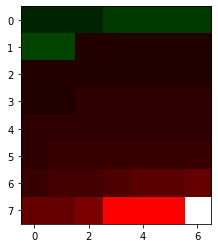

ave. change -0.01419502235757286
med. change -0.012203497660678003


  1%|          | 57/7078 [00:59<1:57:23,  1.00s/it]

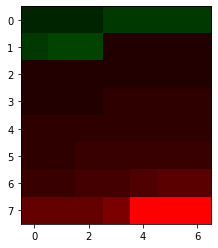

ave. change -0.01346699846587452
med. change -0.012203497660678003


  1%|          | 58/7078 [01:00<1:57:28,  1.00s/it]

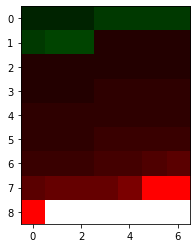

ave. change -0.013578506434014481
med. change -0.012203497660678003


  1%|          | 59/7078 [01:01<1:57:23,  1.00s/it]

HTTP Error 404: Not Found


  1%|          | 60/7078 [01:02<1:57:19,  1.00s/it]

HTTP Error 404: Not Found


  1%|          | 61/7078 [01:03<1:57:16,  1.00s/it]

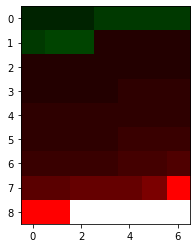

ave. change -0.013351458179891485
med. change -0.012203497660678003


  1%|          | 62/7078 [01:04<1:57:14,  1.00s/it]

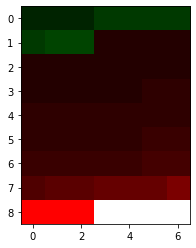

ave. change -0.01317604331608006
med. change -0.01205059288918589


  1%|          | 63/7078 [01:05<1:57:12,  1.00s/it]

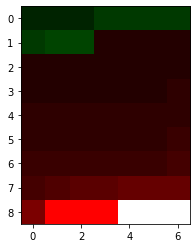

ave. change -0.012992797091554261
med. change -0.01205059288918589


  1%|          | 64/7078 [01:06<1:57:10,  1.00s/it]

HTTP Error 404: Not Found


  1%|          | 65/7078 [01:07<1:57:09,  1.00s/it]

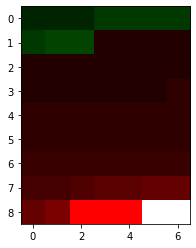

ave. change -0.012951569380400148
med. change -0.011295681063122918


  1%|          | 66/7078 [01:08<1:57:08,  1.00s/it]

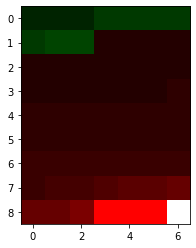

ave. change -0.013085158599941388
med. change -0.01205059288918589


  1%|          | 67/7078 [01:09<1:57:06,  1.00s/it]

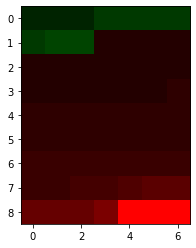

ave. change -0.01329599419190315
med. change -0.01205059288918589


  1%|          | 68/7078 [01:10<1:57:05,  1.00s/it]

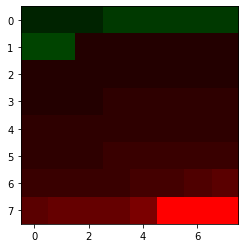

ave. change -0.013293325569989321
med. change -0.012203497660678003


  1%|          | 69/7078 [01:11<1:57:21,  1.00s/it]

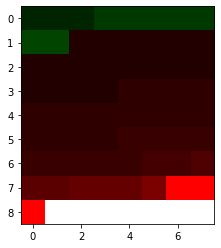

ave. change -0.013169956603872449
med. change -0.01205059288918589


  1%|          | 70/7078 [01:12<1:57:17,  1.00s/it]

HTTP Error 404: Not Found


  1%|          | 71/7078 [01:13<1:57:13,  1.00s/it]

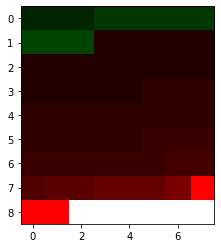

ave. change -0.012360669577613835
med. change -0.01205059288918589


  1%|          | 72/7078 [01:14<1:57:40,  1.01s/it]

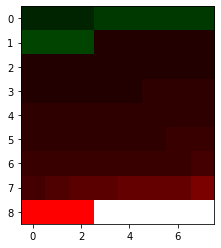

ave. change -0.012476107387456439
med. change -0.01205059288918589


  1%|          | 73/7078 [01:15<1:57:27,  1.01s/it]

HTTP Error 404: Not Found


  1%|          | 74/7078 [01:16<1:57:17,  1.00s/it]

HTTP Error 404: Not Found


  1%|          | 75/7078 [01:17<1:57:11,  1.00s/it]

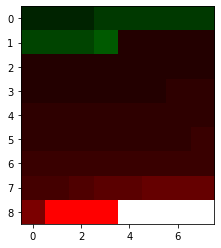

ave. change -0.011389118955616388
med. change -0.01205059288918589


  1%|          | 76/7078 [01:18<1:57:06,  1.00s/it]

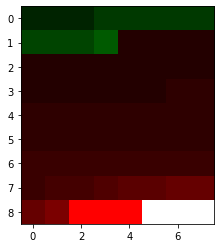

ave. change -0.011379584051902508
med. change -0.011295681063122918


  1%|          | 77/7078 [01:19<1:57:04,  1.00s/it]

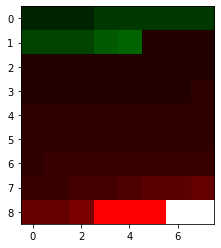

ave. change -0.010196991548804851
med. change -0.011295681063122918


  1%|          | 78/7078 [01:20<1:57:02,  1.00s/it]

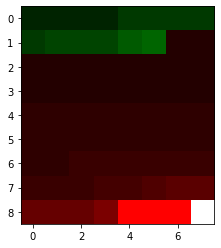

ave. change -0.010023791653034457
med. change -0.010759815310500256


  1%|          | 79/7078 [01:21<1:57:00,  1.00s/it]

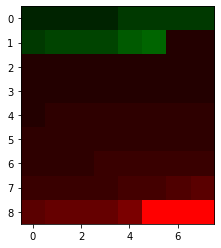

ave. change -0.010010099982459667
med. change -0.010759815310500256


  1%|          | 80/7078 [01:22<1:56:59,  1.00s/it]

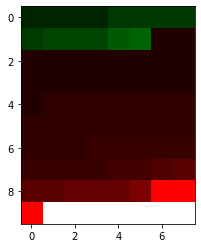

ave. change -0.010611146173186434
med. change -0.010759815310500256


  1%|          | 81/7078 [01:23<1:56:56,  1.00s/it]

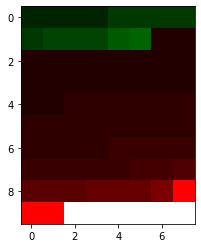

ave. change -0.010479103184030844
med. change -0.010759815310500256


  1%|          | 82/7078 [01:24<1:56:53,  1.00s/it]

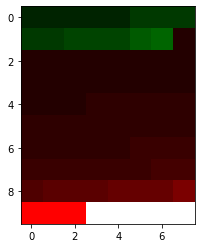

ave. change -0.01031990335968146
med. change -0.010601589844615723


  1%|          | 83/7078 [01:25<1:56:54,  1.00s/it]

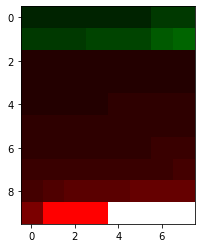

ave. change -0.010170448261985316
med. change -0.010601589844615723


In [ ]:
update_stock_df()

In [ ]:
print(os.path.getsize("/content/drive/MyDrive/Investment_Analysis/stock_df.txt")/1024/1024/1024)